**Student Spending Habits(Linear Regression Project)**

The data set was abstracted from Kaggle and authored by Summanth Nimmagadda and Kiran Challagiri. It contains fictional data representing the habits of 1000 students across various demographic groups and academic backgrounds.

The dataset has 18 columns which includes age, gender, year in school, major, monthly income, financial aid received and spending categories (tuition, housing, food, transportation, books & supplies, entertainment, personal care, technology, health and wellness and miscellaneous) and preferred method of payment.

The team wanted to see if there was a relationship between student's monthly income and tuituion on the amount of financial aid received.
      
      y(financial_aid) = Bo + x1(monthly_income) + x2(tuition)


**Import Libraries**

In [6]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Load and Read Data File**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving student_spending_rja.csv to student_spending_rja.csv


In [2]:
import pandas as pd
import io

student_spending = pd.read_csv(io.BytesIO(uploaded['student_spending_rja.csv']))
print(student_spending)

     Unnamed: 0  age      gender year_in_school             major  \
0             0   19  Non-binary      aFreshman        Psychology   
1             1   24      Female        cJunior         Economics   
2             2   24  Non-binary        cJunior         Economics   
3             3   23      Female        dSenior  Computer Science   
4             4   20      Female        dSenior  Computer Science   
..          ...  ...         ...            ...               ...   
995         995   22      Female        dSenior           Biology   
996         996   19      Female        dSenior           Biology   
997         997   20        Male        cJunior         Economics   
998         998   22  Non-binary        dSenior         Economics   
999         999   24  Non-binary     bSophomore  Computer Science   

     monthly_income  financial_aid  tuition  housing  food  transportation  \
0               958            270     5939      709   296             123   
1              

**Exploratory Data Analyses**

In [8]:
student_spending['monthly_income'].describe()

count   1000.00
mean    1020.65
std      293.84
min      501.00
25%      770.75
50%     1021.00
75%     1288.25
max     1500.00
Name: monthly_income, dtype: float64

In [9]:
correlations = student_spending[['monthly_income', 'tuition']].corr()
print(correlations)

                monthly_income  tuition
monthly_income            1.00    -0.00
tuition                  -0.00     1.00


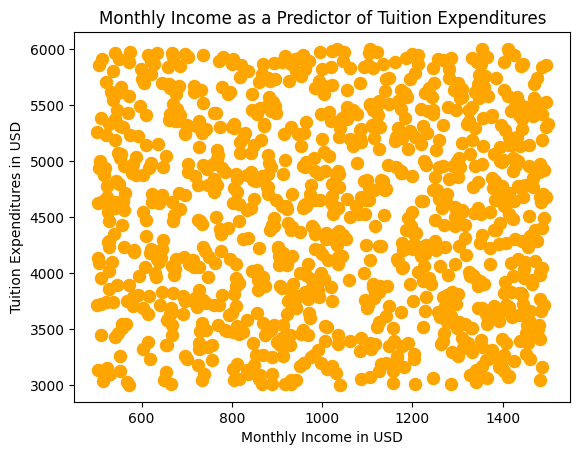

In [10]:
student_spending.plot.scatter(x='monthly_income', y='tuition', s =75, c = "orange")
plt.title('Monthly Income as a Predictor of Tuition Expenditures')
plt.xlabel('Monthly Income in USD')
plt.ylabel('Tuition Expenditures in USD')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [11]:
correlations = student_spending[['monthly_income', 'financial_aid']].corr()
print(correlations)

                monthly_income  financial_aid
monthly_income            1.00           0.04
financial_aid             0.04           1.00


In [12]:
correlations = student_spending[['monthly_income', 'food']].corr()
print(correlations)

                monthly_income  food
monthly_income            1.00 -0.02
food                     -0.02  1.00


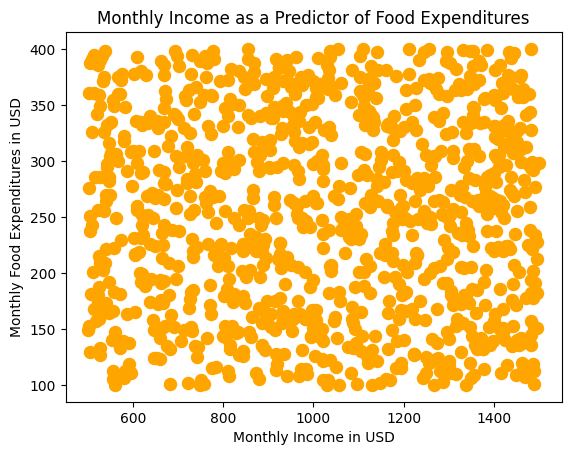

In [13]:
student_spending.plot.scatter(x='monthly_income', y='food', s =75, c = "orange")
plt.title('Monthly Income as a Predictor of Food Expenditures')
plt.xlabel('Monthly Income in USD')
plt.ylabel('Monthly Food Expenditures in USD')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Text(0.5, 0, 'Year in School')

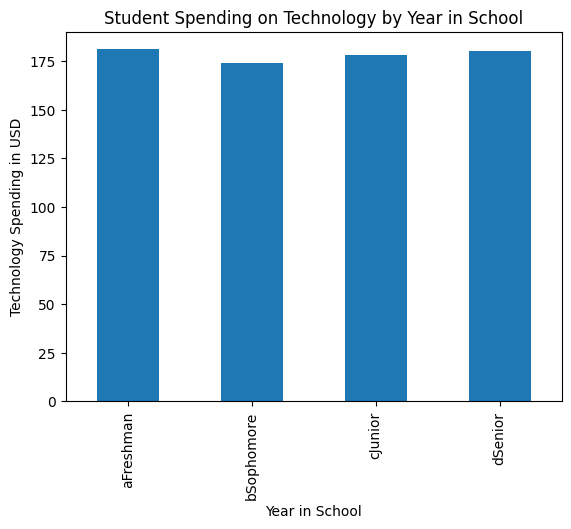

In [14]:
plot = student_spending.groupby('year_in_school')['technology'].mean().plot(kind='bar')
plt.title('Student Spending on Technology by Year in School')
plt.ylabel('Technology Spending in USD')
plt.xlabel('Year in School')

<ipython-input-15-cca32983efd6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_spending, x="preferred_payment_method", y="housing", palette = "Set1")


Text(0.5, 0, 'Preferred Payment Method')

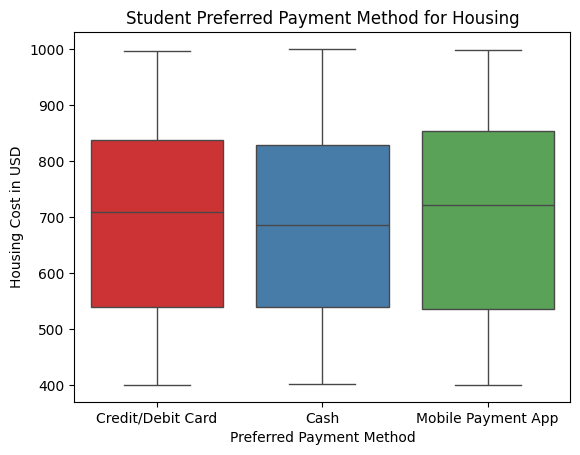

In [15]:
sns.boxplot(data=student_spending, x="preferred_payment_method", y="housing", palette = "Set1")
plt.title('Student Preferred Payment Method for Housing')
plt.ylabel('Housing Cost in USD')
plt.xlabel('Preferred Payment Method')

In [16]:
freq_table = pd.crosstab(student_spending['major'], 'major')

freq_table

col_0,major
major,
Biology,228
Computer Science,192
Economics,204
Engineering,192
Psychology,184


In [17]:
pd.crosstab(student_spending.year_in_school, student_spending.major)

major,Biology,Computer Science,Economics,Engineering,Psychology
year_in_school,,,,,
aFreshman,57,53,44,47,52
bSophomore,57,46,56,40,47
cJunior,61,46,48,48,44
dSenior,53,47,56,57,41


**Train / Test Splits**

In [18]:
 #Use scikit-learn for linear regression to predict financial aid from income and tuition costs.
# Preparing the data for training
X = student_spending[["monthly_income", "tuition"]]  # Features
y = student_spending["financial_aid"]  # Target variable

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit() function to fit on the training datasets X_train, y_train.

In [20]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Linear Regression Results**

In [21]:
print(model.intercept_)

423.7564419600918


In [22]:
# Print the model coefficients
print(model.coef_)


[0.03955134 0.00776902]


monthly_income coefficient = 0.0396

tuition coefficient = 0.0078

In [23]:
model.score(X_train, y_train)

0.002113373958642306

0.211% of the variation in financial_aid is accounted for by monthly_income and tuition on the training model.

In [24]:
model.score(X_test, y_test)

-0.0052552222978761165

The score function was used on the testing datasets to give us a sense on how well the model performs on data it has not seen before.  
For the test datasets, only -0.526% of the variation in financial_aid is accounted for by monthly_income and tution on the test datasets.

In [25]:
# Making predictions on the test set
predictions = model.predict(X_test)
print(predictions)

[489.7570423  495.38957757 498.43856242 479.70958775 513.81273459
 509.17463116 500.98114636 501.24741367 488.43913789 517.91124405
 502.12107289 506.53034526 481.56073305 518.55042108 498.28177109
 493.02214685 479.31266232 506.62851309 478.61768874 525.1004058
 479.59799928 486.4283724  510.40566707 500.72618529 507.41460035
 483.23389556 509.16404018 512.45951272 511.06603586 496.14176191
 508.27201427 477.80406285 484.96144358 519.23974433 506.1440138
 479.19683285 519.07659442 484.38229897 494.04483249 487.7123807
 516.0269024  518.75453367 496.54504293 504.22647699 494.87470427
 507.40259054 505.74496656 477.56180965 500.30665527 482.62297112
 503.70242455 500.36951736 477.47070147 476.61045808 479.48287588
 526.32791059 499.29880461 485.69314243 485.45089123 510.00662204
 473.86305219 489.62638127 503.17483789 482.27901226 500.61812184
 507.95772124 489.61861226 508.36453649 508.00151207 503.93902363
 493.73689774 519.85985241 503.81825131 515.9824076  517.72054839
 475.51997191

In [26]:
# Calculating the Root Mean Squared Error (RMSE) as the performance metric
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
#"""
 #Interpretation of the RMSE score:
#The RMSE indicates the average deviation of the predicted financial aid from the actual financial aid.
#A lower RMSE value indicates a better fit to the data.

279.6524086378443


In [27]:
# Calculate residuals
residuals = y_test - predictions

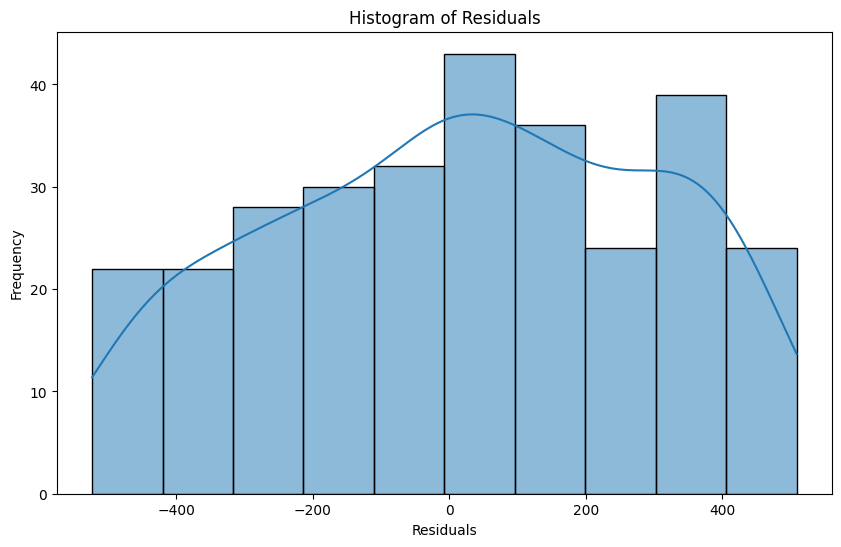

In [28]:
# Plotting the histogram of the residuals with a KDE
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Check for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk test results: statistic = {stat:.4f}, p-value = {p:.4f}')

# If p-value is less than 0.05, reject the null hypothesis of normality
if p < 0.05:
    print('Residuals are not normally distributed.')
else:
    print('Residuals are normally distributed.')


Shapiro-Wilk test results: statistic = 0.9653, p-value = 0.0000
Residuals are not normally distributed.



The Shapiro-Wilk test revealed a statistic of 0.9653 and a highly significant p-value of 0.0000. This indicates that we can reject the null hypothesis of normality for the residuals. In other words, the residuals are very unlikely to be normally distributed.

Shapiro-Wilk Test: This statistical test assesses how likely it is that your data originated from a normal distribution.




In [30]:
#correlations = model[[predictions, residuals]].corr()
#print(correlations)

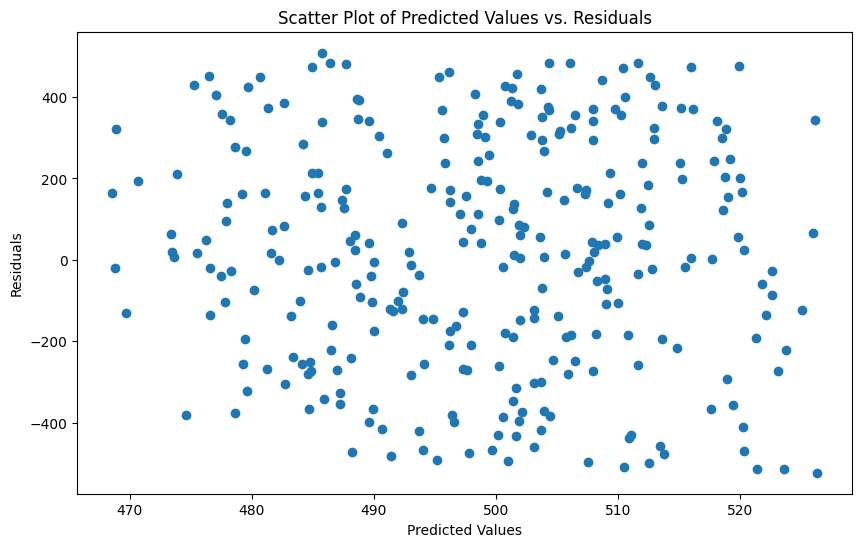

In [31]:
# Scatter plot of predicted values vs residuals to check the assumption of homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.title('Scatter Plot of Predicted Values vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**Conclusion**

Our team's quest was to determine if there was a relationship to the amount of financial aid recieved and the student's monthly income and tuition costs.

Linear Regression with a test/train split was used to see if predictions could be made about receiving financial aid.

Model:

y(financial_aid) = 423.76 +x 1(0.0396) + x2(0.0078)

The R2 score for the testing datasets which explains that -0.526% of the variation in financial_aid is accounted for by monthly_income and tution on the test datasets. The model is not likely to be used to predict financial aid for students.




